## Import and directories

In [1]:
#directories
import os
try:
    parentdir
except NameError:
    parentdir=os.getcwd()
else:
    parentdir = parentdir
homedir=r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/201702_S101toS104/S101d14Feb17_60.5_635_A2_CuAzu655';#data directory
print('The working directory is parentdir: %s' %parentdir)
print('The data directory is homedir: %s' %homedir)

The working directory is parentdir: /home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/Azurin_SM_repo/Analysis
The data directory is homedir: /home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/201702_S101toS104/S101d14Feb17_60.5_635_A2_CuAzu655


In [8]:
#Import modules
import os.path
import glob
import os
import re
from xlwt import Workbook

import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from numpy import sqrt, pi, exp, linspace, loadtxt

from pylab import *
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## Figure Parameters

In [6]:
mpl.rcParams["font.family"] = "sans-serif"
mpl.rcParams["font.size"] = "14"

## Python .py run

In [3]:
os.chdir(parentdir)
!python Analysis_CuAz_April2017.py
%run Analysis_CuAz_April2017.py

In [ ]:
#Run this once to run the .py file.
os.chdir(parentdir)
!python Analysis_bis.py
%run Analysis_bis.py

/home/biswajit/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:804: RuntimeWarning: invalid value encountered in greater_equal
  not_smaller_than_edge = (sample[:, i] >= edges[i][-1])


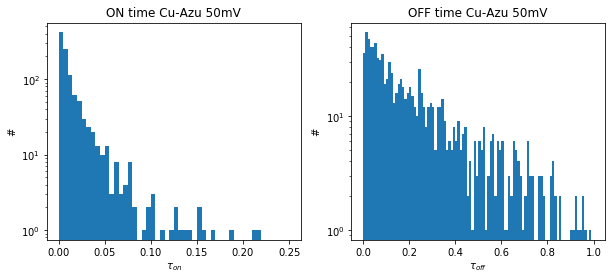

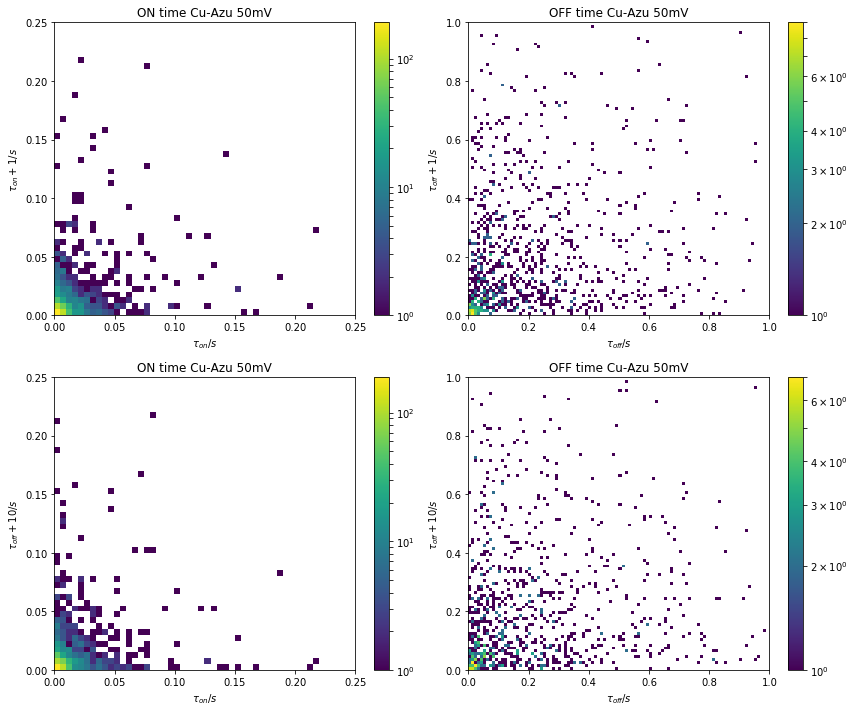

In [4]:
#*************Analysis for a specific potential********************

titel = 'average_on_and_off_time_specific_mV_Cu.xls' #name excell output file
pointnumbers = 31 #Change this to the minimal amount of points
pot = 18 #number of potentials
specific_potential = 50 #the specific potential you want the plots for
onMax=0.25;offMax=1;
rnge_on = [[0,onMax], [0,onMax]] #range on histograms, form: [[0,0.25], [0,0.25]] --> [xrange], [yrange]
rnge_off = [[0,offMax], [0,offMax]] #range off histograms
bins_on = 50  #bins for the on histograms
bins_off = 100 #bins for the off histograms
proteins = 'Cu' #change this to 'Zn' or 'Cu' depending on which files you are analysing. Changes title of plots.
current_dir = homedir#'S101d14Feb17_60.5_635_A2_CuAzu655' #foldername you want to work in.
max_his_on = onMax
max_his_off = offMax
x_shift = 10 # t vs  t + x_shift 

histograms(pot, pointnumbers, specific_potential, rnge_on, rnge_off, bins_on, bins_off, proteins, current_dir, max_his_on, max_his_off, x_shift, plots=True);

## Time trace plot

0.0
25.0
100.0
50.0


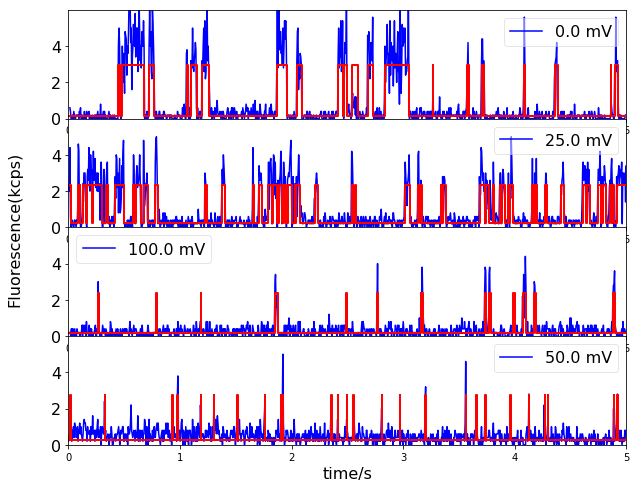

In [9]:
# folderpath = r'D:\Research\Experimental\Analysis\2017analysis\201702\Analysis_Sebby_March_2017\S101d14Feb17_60.5_635_A2_CuAzu655'
fig = time_trace_plot(foldername= homedir, input_potential=[0, 25, 50, 100], pointnumbers=[1], x_lim_min=0, y_lim_min=0, x_lim_max=5, y_lim_max=6, bin=5, show_changepoint=True)

## FCS plot

### Aexp(-t/t_ac)

(5.6149517615976183, 11.135664739515827, 0.50423139461737732)

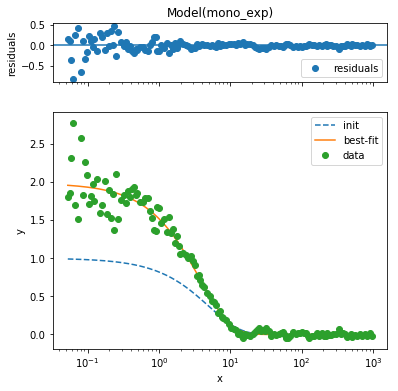

In [10]:
df_datn_em_specific, df_fcs_specific = get_point_specifics(foldername= homedir, input_potential=[90], pointnumbers=[1])
df_fcs=df_fcs_specific['filepath[FCS]'][0]
df_emplot = df_datn_em_specific['filepath[.em.plot]'][0]
df_datn = df_datn_em_specific['filepath[.datn]'][0]
def FCS_mono_fit(df_fcs,df_emplot, tmin=0.05,tmax=1000):
    df_fcs = pd.read_csv(df_fcs, index_col=False, names=None, skiprows=1, header=None, sep='\s+');
    df_fcs = df_fcs[df_fcs[0]>=tmin];
    df_fcs = df_fcs[df_fcs[0]<=tmax];
    xdata=df_fcs[0];
    ydata=df_fcs[1];
    df_em = pd.read_csv(df_emplot, header=None, sep='\t')#changepoint
    S=max(df_em[1]);
    Bkr=min(df_em[1]);
    correction_BG = (S/(S+Bkr))**2
    ydata= ((ydata)/correction_BG)
    def mono_exp(x, A, t_ac, t_rise):
        return A*exp(-x/t_ac)
    gmodel = Model(mono_exp)
    gmodel.set_param_hint('A', value=1, min=0.05, max=100)
    gmodel.set_param_hint('t_ac', value=5, min=1, max=100)
    gmodel.set_param_hint('t_rise', value=5, min=1, max=100)
    pars = gmodel.make_params()
    result = gmodel.fit(ydata, pars, x=xdata)#, A=1, B=1, t_ac=1
    A = result.best_values['A']
    t_ac = result.best_values['t_ac']
    toff = t_ac*(1+A); ton = t_ac*(1+(1/A));
    tratio_on_off = ton/toff
    return(ton, toff, tratio_on_off, result)#, t_on_err, t_off_err
ton, toff, tratio_on_off, result = FCS_mono_fit(df_fcs, df_emplot)
result.plot()
xscale('log')
ton, toff, tratio_on_off

## Time trace output folderwise

In [12]:
out_total = timetrace_outputs_folderwise(folderpath=homedir, pointnumbers=[1], potentialist=potentialist)
out_total

Point_1                                                           \
   Potential t_ratio_timetrace                                          
   Potential            t_onav t_onaverr t_offav t_offaverr   t_ratio   
0        0.0             42.32       1.0  154.63        4.0  0.273686   
1       15.0             30.04       2.0   60.99        5.0  0.492540   
2       20.0             23.06       3.0   74.90        6.0  0.307877   
3       25.0             22.86       4.0   71.20        7.0  0.321067   
4       35.0             24.54       5.0   90.63        8.0  0.270771   
5       40.0             20.36       6.0   96.83        9.0  0.210265   
6       50.0              3.75       7.0  260.72       10.0  0.014383   
7       55.0             17.81       8.0  144.02       11.0  0.123663   
8       60.0             12.02       9.0  141.88       12.0  0.084719   
9       75.0              7.17      10.0  185.63       13.0  0.038625   
10      90.0              5.04      11.0  193.57       14.0  0.026037   
11     100.0              8.73      12.0  522.25       15.0  0.016716   

                                                                           
              t_ratio_FCS                                                  
   t_ratioerr      t_onav t_onaverr t_offav t_offaverr t_ratio t_ratioerr  
0        20.0         0.0       0.0     1.0        0.0     0.0        0.0  
1        21.0         2.0       5.0     2.0        0.5     6.0        7.0  
2        22.0         4.0      10.0     3.0        1.0    12.0       14.0  
3        23.0         6.0      15.0     4.0        1.5    18.0       21.0  
4        24.0         8.0      20.0     5.0        2.0    24.0       28.0  
5        25.0        10.0      25.0     6.0        2.5    30.0       35.0  
6        26.0        12.0      30.0     7.0        3.0    36.0       42.0  
7        27.0        14.0      35.0     8.0        3.5    42.0       49.0  
8        28.0        16.0      40.0     9.0        4.0    48.0       56.0  
9        29.0        18.0      45.0    10.0        4.5    54.0       63.0  
10       30.0        20.0      50.0    11.0        5.0    60.0       70.0  
11       31.0        22.0      55.0    12.0        5.5    66.0       77.0